In [2]:
#Question: What is the popularity of each genre in each decade (90's until now)
#Question: Can we predict the popularity of the next genre?
#Question: Can we predict which platform will produce which genre?

In [3]:
#Exploratory Data Analysis for streaming data from all platforms
#Importing needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#Loading in the data
df = pd.read_csv("Desktop/All Streaming Data 1.29.23 (1).csv")

In [6]:
#Viewing the dataframe
df.head()

,platform,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,...,genre1,genre2,genre3,genre4,genre5,genre6,genre7,genre8,genre9,genre10
0,Disney,tm19438,The Princess Bride,MOVIE,"In this enchantingly cracked fairy tale, the b...",1987,PG,99,"fantasy, family, romance",['US'],...,fantasy,family,romance,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Disney,ts20711,The Simpsons,SHOW,The satiric adventures of a working-class fami...,1989,TV-14,27,"animation, comedy",['US'],...,animation,comedy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Disney,ts15377,America's Funniest Home Videos,SHOW,America's Funniest Home Videos is the longest-...,1989,TV-PG,49,"animation, reality, comedy",['US'],...,animation,reality,comedy,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Disney,ts22130,Rolie Polie Olie,SHOW,Rolie Polie Olie was a children's television s...,1998,TV-Y,21,"animation, comedy, family, fantasy, scifi","['FR', 'GB', 'US', 'CA']",...,animation,comedy,family,fantasy,scifi,NaN,NaN,NaN,NaN,NaN
4,Disney,tm38852,Horton Hears a Who!,MOVIE,"One day, Horton the elephant hears a cry from ...",2008,G,86,"fantasy, family, drama, romance, comedy, music...",['US'],...,fantasy,family,drama,romance,comedy,music,animation,NaN,NaN,NaN


In [7]:
#exploring the basics
df.shape

(19654, 26)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19654 entries, 0 to 19653
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   platform              19654 non-null  object 
 1   id                    19654 non-null  object 
 2   title                 19653 non-null  object 
 3   type                  19654 non-null  object 
 4   description           19498 non-null  object 
 5   release_year          19654 non-null  int64  
 6   age_certification     9538 non-null   object 
 7   runtime               19654 non-null  int64  
 8   genres                19654 non-null  object 
 9   production_countries  19654 non-null  object 
 10  seasons               5208 non-null   float64
 11  imdb_id               18047 non-null  object 
 12  imdb_score            17558 non-null  float64
 13  imdb_votes            17528 non-null  float64
 14  tmdb_popularity       18955 non-null  float64
 15  tmdb_score         

In [12]:
#Preparing data

In [13]:
#dropping columns to prepare for analysis
to_drop = ['description', 'age_certification', 'seasons', 'genres', 'genre2', 'genre3', 'genre4', 'genre5', 'genre6', 'genre7', 'genre8', 'genre9', 'genre10']
df.drop(to_drop, inplace=True, axis=1)

In [14]:
#Verifying that columns were dropped
df.head()

,platform,id,title,type,release_year,runtime,production_countries,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,genre1
0,Disney,tm19438,The Princess Bride,MOVIE,1987,99,['US'],tt0093779,8.0,420521.0,21.284,7.7,fantasy
1,Disney,ts20711,The Simpsons,SHOW,1989,27,['US'],tt0096697,8.7,394764.0,516.381,7.9,animation
2,Disney,ts15377,America's Funniest Home Videos,SHOW,1989,49,['US'],tt0098740,6.2,5356.0,18.117,7.0,animation
3,Disney,ts22130,Rolie Polie Olie,SHOW,1998,21,"['FR', 'GB', 'US', 'CA']",tt0172049,6.3,2861.0,8.697,6.8,animation
4,Disney,tm38852,Horton Hears a Who!,MOVIE,2008,86,['US'],tt0451079,6.8,138363.0,37.730,6.5,fantasy


In [19]:
#Viewing NA values in df
df.isna().sum()

platform                   0
id                         0
title                      1
type                       0
release_year               0
runtime                    0
production_countries       0
imdb_id                 1607
imdb_score              2096
imdb_votes              2126
tmdb_popularity          699
tmdb_score              2662
genre1                     0
dtype: int64

In [22]:
#removing NAs from dataset
df = df.dropna()

In [23]:
#checking null values after removal
df.isna().sum()

platform                0
id                      0
title                   0
type                    0
release_year            0
runtime                 0
production_countries    0
imdb_id                 0
imdb_score              0
imdb_votes              0
tmdb_popularity         0
tmdb_score              0
genre1                  0
dtype: int64

In [24]:
#Exploring genre1 to set up for the first question. What is the relationship between the genre and all other variables? 
df.genre1.describe()

count     15611
unique       20
top       drama
freq       3799
Name: genre1, dtype: object

In [25]:
#Exploring genre1
df.genre1.value_counts()

drama            3799
comedy           3048
thriller         1442
documentation    1369
action            948
scifi             862
romance           723
animation         722
horror            657
crime             528
fantasy           420
reality           363
western           323
music             119
war                98
family             85
history            64
[]                 23
sport              15
european            3
Name: genre1, dtype: int64

In [30]:
#Exploring the mean of the tmdb_score in each genre
df.groupby(by="genre1")["tmdb_score"].mean()

genre1
[]               6.543478
action           6.544889
animation        7.132899
comedy           6.365563
crime            6.596716
documentation    7.056052
drama            6.517069
european         5.633333
family           6.536471
fantasy          6.313493
history          6.808531
horror           5.257192
music            6.795513
reality          7.105785
romance          6.099864
scifi            6.837646
sport            6.666667
thriller         5.893997
war              6.932847
western          5.442099
Name: tmdb_score, dtype: float64

In [31]:
#Is there a difference between tmdb_score and imdb_score? 
df.tmdb_score.mean()

6.447438216642111

In [32]:
df.imdb_score.mean()

6.275421177374929

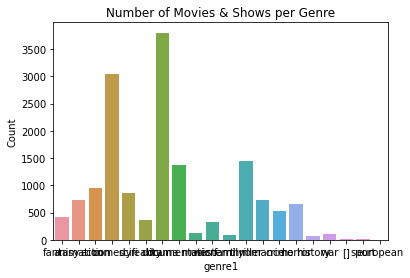

In [34]:
#Univariate analysis for categorical data 
#Create a countplot to visualize the count of each category in genre1
sns.countplot(data=df, x="genre1")
plt.title("Number of Movies & Shows per Genre")
plt.ylabel("Count")
plt.show()

In [35]:
#There are no categorical ordered variables in this dataset

In [36]:
#Numeric univariate analysis
df["genre1"].describe()
#Based on output, drama is the most frequent

count     15611
unique       20
top       drama
freq       3799
Name: genre1, dtype: object

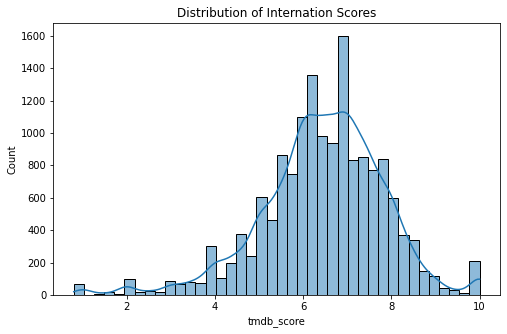

In [37]:
#How is this tmdb_score data distributed?
plt.figure(figsize=[8,5])
sns.histplot(data=df,x="tmdb_score",bins=40, kde=True).set(title="Distribution of Internation Scores",ylabel="Count")
plt.show()

In [38]:
#Pretty normally distributed. Lets see how it looKs with descibe()
df2["tmdb_score"].describe()

count    15611.000000
mean         6.447438
std          1.390001
min          0.800000
25%          5.700000
50%          6.500000
75%          7.300000
max         10.000000
Name: tmdb_score, dtype: float64

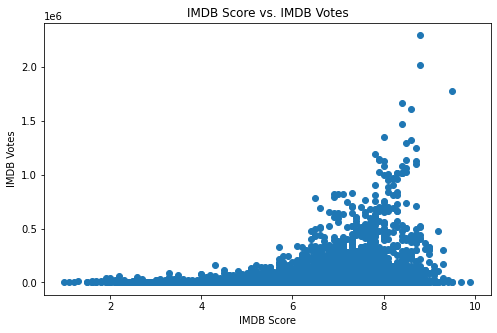

In [39]:
#Bivariate analysis to explore relationships between these variables and how the influence each other, if at all. 
#Numeric-to-Numeric: Scatter plot
#Let's investigate the relationship between imdb score and votes
plt.figure(figsize=[8,5])
plt.scatter(data=df2, x="imdb_score", y="imdb_votes")
plt.title("IMDB Score vs. IMDB Votes")
plt.xlabel("IMDB Score")
plt.ylabel("IMDB Votes")
plt.show()
#There maybe some correlation between number of votes and the imdb score

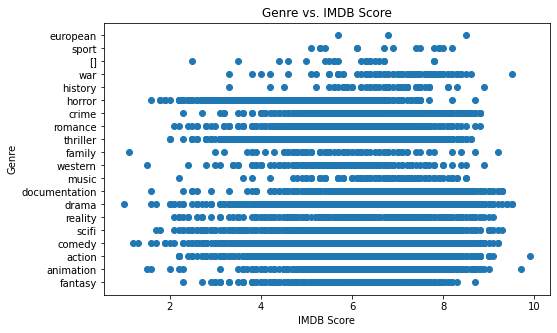

In [46]:
#Scatter plot to explore relationship between Genre and IMDB score
plt.figure(figsize=[8,5])
plt.scatter(data=df, x="imdb_score", y="genre1")
plt.title("Genre vs. IMDB Score")
plt.xlabel("IMDB Score")
plt.ylabel("Genre")
plt.show()
#This would look better in a different graph. 

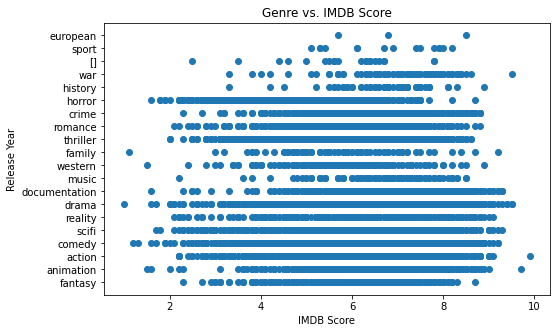

In [47]:
#Scatter plot to explore relationship between release year and tmdb popularity
plt.figure(figsize=[8,5])
plt.scatter(data=df, x="imdb_score", y="genre1")
plt.title("Genre vs. IMDB Score")
plt.xlabel("IMDB Score")
plt.ylabel("Release Year")
plt.show()
#This may indicate that the release year has some impact on the tmdb score, but this may be because of the rating system 

In [49]:
#Correlation matrix to show relationship between select variables
corr_matrix = df[["runtime","imdb_score","tmdb_score","release_year"]].corr()
corr_matrix
#There is 61% correlation between the tmdb_score and the imdb_score

,runtime,imdb_score,tmdb_score,release_year
runtime,1.000000,-0.182582,-0.259980,-0.036117
imdb_score,-0.182582,1.000000,0.613264,0.068266
tmdb_score,-0.259980,0.613264,1.000000,0.199509
release_year,-0.036117,0.068266,0.199509,1.000000


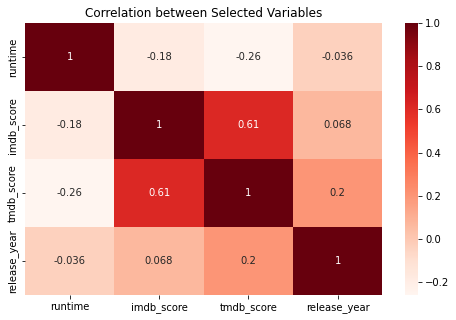

In [50]:
plt.figure(figsize=[8,5])
sns.heatmap(corr_matrix,annot=True,cmap='Reds')
plt.title("Correlation between Selected Variables")
plt.show()
#tmdb_score and imdb_score have 0.61 correlation coeffecient and can be considered moderately correlated

In [52]:
#Numerical-Categorical analysis
#Check the mean imdb_score per genre 
df.groupby('genre1')['imdb_score'].mean()

genre1
[]               5.800000
action           6.139979
animation        6.486288
comedy           6.240879
crime            6.504545
documentation    7.070197
drama            6.501500
european         7.000000
family           5.728235
fantasy          6.075238
history          6.693750
horror           4.774581
music            6.623529
reality          6.297796
romance          5.980221
scifi            6.458585
sport            6.773333
thriller         5.713245
war              7.058163
western          5.794427
Name: imdb_score, dtype: float64

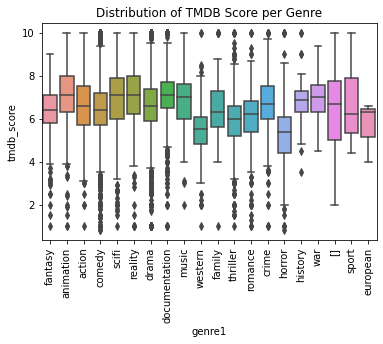

In [54]:
#Plot boxplots to compare dispersion 
sns.boxplot(data=df,x='genre1',y='tmdb_score')
plt.xticks(rotation=90)
plt.title("Distribution of TMDB Score per Genre")
plt.show()

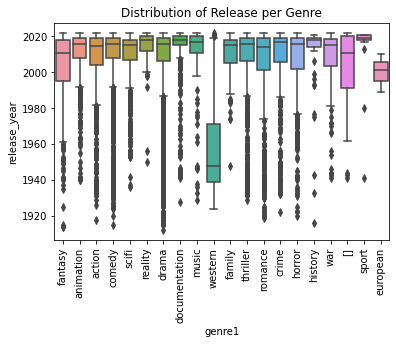

In [55]:
#Plot boxplots to compare dispersion 
sns.boxplot(data=df,x='genre1',y='release_year')
plt.xticks(rotation=90)
plt.title("Distribution of Release per Genre")
plt.show()

Text(0.5, 0, 'Platform')

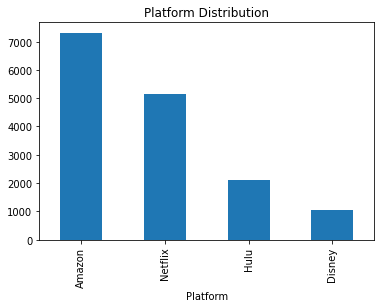

In [56]:
#Distribution of movies and shows on each platform
Platform = df2['platform'].value_counts().plot(kind='bar')
Platform.set_title("Platform Distribution")
Platform.set_xlabel("Platform")

<AxesSubplot: xlabel='platform'>

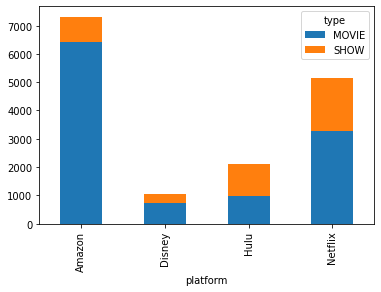

In [57]:
#Distribution of shows and movies per platform
crosstab_df2 = pd.crosstab(df2['platform'], df2['type'])
crosstab_df2.plot.bar(stacked=True)

In [58]:
def genreR (series):
  if series == "genre1":
    return "0"
  if series == "fantasy": 
    return "1"
  if series == "animation": 
    return "2"
  if series == "action":
    return "3"
  if series == "comedy":
    return "4"
  if series == "scifi":
    return "5"
  if series == "reality":
    return "6"
  if series == "drama":
    return "7"
  if series == "documentation":
    return "8"
  if series == "music":
    return "9"
  if series == "western":
    return "10"
  if series == "family":
    return "11"
  if series == "thriller":
    return "12"
  if series == "romance":
    return "13"
  if series == "crime":
    return "14"
  if series == "horror":
    return "15"
  if series == "history":
    return "16"
  if series == "war":
    return "17"
  if series == "[]":
    return "18"
  if series == "sport":
    return "19"
  if series == 'european':
    return "20"
df["genreR"] = df["genre1"].apply(genreR)

In [59]:
df.head()

,platform,id,title,type,release_year,runtime,production_countries,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,genre1,genreR
0,Disney,tm19438,The Princess Bride,MOVIE,1987,99,['US'],tt0093779,8.0,420521.0,21.284,7.7,fantasy,1
1,Disney,ts20711,The Simpsons,SHOW,1989,27,['US'],tt0096697,8.7,394764.0,516.381,7.9,animation,2
2,Disney,ts15377,America's Funniest Home Videos,SHOW,1989,49,['US'],tt0098740,6.2,5356.0,18.117,7.0,animation,2
3,Disney,ts22130,Rolie Polie Olie,SHOW,1998,21,"['FR', 'GB', 'US', 'CA']",tt0172049,6.3,2861.0,8.697,6.8,animation,2
4,Disney,tm38852,Horton Hears a Who!,MOVIE,2008,86,['US'],tt0451079,6.8,138363.0,37.730,6.5,fantasy,1


In [60]:
#ok, maybe I will proceed but that warning may throw some problems my way
#genre 18 is [] or none

In [61]:
df.genreR.value_counts()

7     3799
4     3048
12    1442
8     1369
3      948
5      862
13     723
2      722
15     657
14     528
1      420
6      363
10     323
9      119
17      98
11      85
16      64
18      23
19      15
20       3
Name: genreR, dtype: int64

In [62]:
#recoding platform 
def platformR (series):
    if series == "platform":
        return "0"
    if series == "Amazon":
        return "1"
    if series == "Netflix":
        return "2"
    if series == "Hulu":
        return "3"
    if series == "Disney":
        return "4"
df["platformR"] = df["platform"].apply(platformR)

In [63]:
def typeR (series):
    if series == "type":
        return "0"
    if series == "MOVIE":
        return "1"
    if series == "SHOW":
        return "2"
df["typeR"] = df["type"].apply(typeR)

In [65]:
#recoding object to numeric variables
df.typeR = df.typeR.astype(int)
df.genreR = df.genreR.astype(int)
df.platformR =df.platformR.astype(int)

In [66]:
#Supervised machine learning
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib as plt
%matplotlib inline
from sklearn import metrics
import numpy as np

In [67]:
import matplotlib.pyplot as plt

In [68]:
#1 Goal in machine learning: Can we accurately predict the genre of movie in the future based on imdb_score for SHOWS? 
#Y variable - genreR
#X Variable 1 - imdb score

#2 Goal in machine learning: Can we predict which platform will host which genres for both movies and shows.
#Y variable - platform
#X Variable 1 - tmdb score
#X Variable 2 - genreR 
#X Variable 3 - tmdb popularity

In [69]:
#Starting with goal 2: Can the platform be predicted based on tmbd score, genre or popularity? 
x = df[['tmdb_score', 'genreR', 'tmdb_popularity']]
y = df['platformR']

In [70]:
#Train Test Split: Typically you want more data to be used for training than for testing. 80/20, 70/30, and 60/40 splits are all acceptable. This is a 60/40 split.
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = .4, random_state=101)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(9366, 3) (9366,)
(6245, 3) (6245,)


In [71]:
#create linear regression model 
lm = LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [72]:
#Interpreting Supervised Machine Learning Accuracy
predictions = lm.predict(x_test)
predictions

array([1.90490868, 1.93206636, 2.0286693 , ..., 1.47464769, 1.52180078,
       1.95994322])

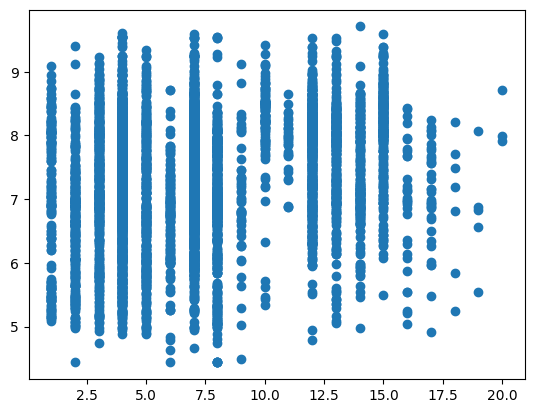

In [49]:
#Creating a scatter plot to view predictions
plt.scatter(y_test, predictions)
#This doesn't look good

In [73]:
#Accuracy Score for if the platform can be predicted.
print("Score:", lm.score(x_test, y_test))

Score: 0.10242144510117224


In [74]:
#The platform can be predicted with a 10% accuracy.

In [85]:
#Switching back to goal 1 to verify findings. 

In [86]:
#Reading in data again for fresh start

In [87]:
df2 = pd.read_csv("Desktop/All Streaming Data 1.29.23 (1).csv")

In [88]:
df2.head()

,platform,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,...,genre1,genre2,genre3,genre4,genre5,genre6,genre7,genre8,genre9,genre10
0,Disney,tm19438,The Princess Bride,MOVIE,"In this enchantingly cracked fairy tale, the b...",1987,PG,99,"fantasy, family, romance",['US'],...,fantasy,family,romance,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Disney,ts20711,The Simpsons,SHOW,The satiric adventures of a working-class fami...,1989,TV-14,27,"animation, comedy",['US'],...,animation,comedy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Disney,ts15377,America's Funniest Home Videos,SHOW,America's Funniest Home Videos is the longest-...,1989,TV-PG,49,"animation, reality, comedy",['US'],...,animation,reality,comedy,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Disney,ts22130,Rolie Polie Olie,SHOW,Rolie Polie Olie was a children's television s...,1998,TV-Y,21,"animation, comedy, family, fantasy, scifi","['FR', 'GB', 'US', 'CA']",...,animation,comedy,family,fantasy,scifi,NaN,NaN,NaN,NaN,NaN
4,Disney,tm38852,Horton Hears a Who!,MOVIE,"One day, Horton the elephant hears a cry from ...",2008,G,86,"fantasy, family, drama, romance, comedy, music...",['US'],...,fantasy,family,drama,romance,comedy,music,animation,NaN,NaN,NaN


In [89]:
df2.shape

(19654, 26)

In [90]:
#Subsetting the data

In [118]:
df3 = df2.drop (['title', 'description', 'age_certification', 'genres', 'production_countries', 'tmdb_popularity','tmdb_score','genre2', 'genre3', 'genre4', 'genre5', 'genre6', 'genre7', 'genre8', 'genre9','genre10', 'seasons', 'imdb_votes', 'imdb_id'], axis=1)

In [119]:
df3.head()

,platform,id,type,release_year,runtime,imdb_score,genre1
0,Disney,tm19438,MOVIE,1987,99,8.0,fantasy
1,Disney,ts20711,SHOW,1989,27,8.7,animation
2,Disney,ts15377,SHOW,1989,49,6.2,animation
3,Disney,ts22130,SHOW,1998,21,6.3,animation
4,Disney,tm38852,MOVIE,2008,86,6.8,fantasy


In [120]:
df3.shape

(19654, 7)

In [121]:
df4 = df3.loc[df2['type']=='SHOW']

In [122]:
df4.head()

,platform,id,type,release_year,runtime,imdb_score,genre1
1,Disney,ts20711,SHOW,1989,27,8.7,animation
2,Disney,ts15377,SHOW,1989,49,6.2,animation
3,Disney,ts22130,SHOW,1998,21,6.3,animation
5,Disney,ts21940,SHOW,2010,23,6.6,action
6,Disney,ts21756,SHOW,2009,22,6.3,comedy


In [113]:
#Viewing and droppings NAs

In [123]:
df4.isnull().sum()

platform          0
id                0
type              0
release_year      0
runtime           0
imdb_score      492
genre1            0
dtype: int64

In [98]:
#So, when the NAs are dropped first using the dropna, it removes all rows that have NA - this means that the variables I don't need must be dropped first

In [124]:
df4.dropna(inplace=True)

C:\Users\lesle\AppData\Local\Temp\ipykernel_24948\1595090722.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4.dropna(inplace=True)


In [125]:
df4.isnull().sum()

platform        0
id              0
type            0
release_year    0
runtime         0
imdb_score      0
genre1          0
dtype: int64

In [126]:
df4.count

<bound method DataFrame.count of       platform        id  type  release_year  runtime  imdb_score     genre1
1       Disney   ts20711  SHOW          1989       27         8.7  animation
2       Disney   ts15377  SHOW          1989       49         6.2  animation
3       Disney   ts22130  SHOW          1998       21         6.3  animation
5       Disney   ts21940  SHOW          2010       23         6.6     action
6       Disney   ts21756  SHOW          2009       22         6.3     comedy
...        ...       ...   ...           ...      ...         ...        ...
19643     Hulu  ts322832  SHOW          2021       40         7.4    reality
19645     Hulu  ts330888  SHOW          2021       24         7.0  animation
19646     Hulu  ts289327  SHOW          2021       43         6.9      sport
19649     Hulu  ts290117  SHOW          2021       11         7.3     comedy
19651     Hulu  ts317705  SHOW          2021       42         4.7    reality

[4716 rows x 7 columns]>

In [127]:
#This leaves 4716 rows of data - close to susan's 4680

In [128]:
df4.head()

,platform,id,type,release_year,runtime,imdb_score,genre1
1,Disney,ts20711,SHOW,1989,27,8.7,animation
2,Disney,ts15377,SHOW,1989,49,6.2,animation
3,Disney,ts22130,SHOW,1998,21,6.3,animation
5,Disney,ts21940,SHOW,2010,23,6.6,action
6,Disney,ts21756,SHOW,2009,22,6.3,comedy


In [129]:
#Checking out the mean of the imdb score
df4.loc[:,'imdb_score'].mean()

7.055067854113655

In [130]:
#The mean is still off from Susan's 7.06

In [131]:
#Recoding variables

In [134]:
def rating_df (series):
    if series == "imdb_score":
        return "0"
    if series <= 6.9:
        return "Negative"
    if series >= 7.0:
        return "Positive"
df4["rating_df"] = df4["imdb_score"].apply(rating_df)

C:\Users\lesle\AppData\Local\Temp\ipykernel_24948\500598205.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4["rating_df"] = df4["imdb_score"].apply(rating_df)


In [133]:
#This gave the same warning as last time

In [135]:
def rating_df1 (series):
    if series == "Rating":
        return "0"
    if series == "Positive":
        return "1"
    if series == "Negative":
        return "2"
df4["rating_df1"] = df4["rating_df"].apply(rating_df1)

C:\Users\lesle\AppData\Local\Temp\ipykernel_24948\3403973350.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4["rating_df1"] = df4["rating_df"].apply(rating_df1)


In [137]:
df4.groupby('rating_df1')['genre1'].count()

rating_df1
1    2814
2    1902
Name: genre1, dtype: int64

In [138]:
#recode platforms
def platformR (series):
    if series == "platform":
        return "0"
    if series == "Amazon":
        return "1"
    if series == "Netflix":
        return "2"
    if series == "Hulu":
        return "3"
    if series == "Disney":
        return "4"
df4["platformR"] = df4["platform"].apply(platformR)

C:\Users\lesle\AppData\Local\Temp\ipykernel_24948\3769233172.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4["platformR"] = df4["platform"].apply(platformR)


In [144]:
#recode genres
def genreR (series):
  if series == "genre1":
    return "0"
  if series == "fantasy": 
    return "1"
  if series == "animation": 
    return "2"
  if series == "action":
    return "3"
  if series == "comedy":
    return "4"
  if series == "scifi":
    return "5"
  if series == "reality":
    return "6"
  if series == "drama":
    return "7"
  if series == "documentation":
    return "8"
  if series == "music":
    return "9"
  if series == "western":
    return "10"
  if series == "family":
    return "11"
  if series == "thriller":
    return "12"
  if series == "romance":
    return "13"
  if series == "crime":
    return "14"
  if series == "horror":
    return "15"
  if series == "history":
    return "16"
  if series == "war":
    return "17"
  if series == "[]":
    return "18"
  if series == "sport":
    return "19"
  if series == 'european':
    return "20"
df4["genreR"] = df4["genre1"].apply(genreR)

C:\Users\lesle\AppData\Local\Temp\ipykernel_24948\461312972.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4["genreR"] = df4["genre1"].apply(genreR)


In [145]:
df4.head()

,platform,id,type,release_year,runtime,imdb_score,genre1,df5,rating_df,rating_df1,platformR,genreR
1,Disney,ts20711,SHOW,1989,27,8.7,animation,Positive,Positive,1,4,2
2,Disney,ts15377,SHOW,1989,49,6.2,animation,Negative,Negative,2,4,2
3,Disney,ts22130,SHOW,1998,21,6.3,animation,Negative,Negative,2,4,2
5,Disney,ts21940,SHOW,2010,23,6.6,action,Negative,Negative,2,4,3
6,Disney,ts21756,SHOW,2009,22,6.3,comedy,Negative,Negative,2,4,4


In [141]:
df4.drop(['df5'], axis = 1)

,platform,id,type,release_year,runtime,imdb_score,genre1,rating_df,rating_df1,platformR
1,Disney,ts20711,SHOW,1989,27,8.7,animation,Positive,1,4
2,Disney,ts15377,SHOW,1989,49,6.2,animation,Negative,2,4
3,Disney,ts22130,SHOW,1998,21,6.3,animation,Negative,2,4
5,Disney,ts21940,SHOW,2010,23,6.6,action,Negative,2,4
6,Disney,ts21756,SHOW,2009,22,6.3,comedy,Negative,2,4
...,...,...,...,...,...,...,...,...,...,...
19643,Hulu,ts322832,SHOW,2021,40,7.4,reality,Positive,1,3
19645,Hulu,ts330888,SHOW,2021,24,7.0,animation,Positive,1,3
19646,Hulu,ts289327,SHOW,2021,43,6.9,sport,Negative,2,3
19649,Hulu,ts290117,SHOW,2021,11,7.3,comedy,Positive,1,3


In [146]:
df4.head()

,platform,id,type,release_year,runtime,imdb_score,genre1,df5,rating_df,rating_df1,platformR,genreR
1,Disney,ts20711,SHOW,1989,27,8.7,animation,Positive,Positive,1,4,2
2,Disney,ts15377,SHOW,1989,49,6.2,animation,Negative,Negative,2,4,2
3,Disney,ts22130,SHOW,1998,21,6.3,animation,Negative,Negative,2,4,2
5,Disney,ts21940,SHOW,2010,23,6.6,action,Negative,Negative,2,4,3
6,Disney,ts21756,SHOW,2009,22,6.3,comedy,Negative,Negative,2,4,4


In [147]:
df4['genreR'] = df4['genreR'].astype(int)


C:\Users\lesle\AppData\Local\Temp\ipykernel_24948\2599508280.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['genreR'] = df4['genreR'].astype(int)


In [148]:
df4['platformR']=df4['platformR'].astype(int)

C:\Users\lesle\AppData\Local\Temp\ipykernel_24948\2367886386.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['platformR']=df4['platformR'].astype(int)


In [149]:
df4.dtypes

platform         object
id               object
type             object
release_year      int64
runtime           int64
imdb_score      float64
genre1           object
df5              object
rating_df        object
rating_df1       object
platformR         int32
genreR            int32
dtype: object

In [150]:
df4['imdb_score']=df4['imdb_score'].astype(int)

C:\Users\lesle\AppData\Local\Temp\ipykernel_24948\302025373.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['imdb_score']=df4['imdb_score'].astype(int)


In [151]:
df4['rating_df1']=df4['rating_df1'].astype(int)

C:\Users\lesle\AppData\Local\Temp\ipykernel_24948\2280391723.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['rating_df1']=df4['rating_df1'].astype(int)


In [152]:
df4.dtypes

platform        object
id              object
type            object
release_year     int64
runtime          int64
imdb_score       int32
genre1          object
df5             object
rating_df       object
rating_df1       int32
platformR        int32
genreR           int32
dtype: object

In [157]:
x1 = df4[['imdb_score']]
y1 = df['genreR']
#I don't think I can use the same variables in this notebook. 